# Identifikation von Texten mit geteilter Autorenschaft

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Exploration:-booksummaries" data-toc-modified-id="Data-Exploration:-booksummaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Exploration: booksummaries</a></span><ul class="toc-item"><li><span><a href="#Extracting-Genres" data-toc-modified-id="Extracting-Genres-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Extracting Genres</a></span></li><li><span><a href="#Wieviele-Autoren-haben-in-wievielen-unterschiedlichen-Genres-publiziert?" data-toc-modified-id="Wieviele-Autoren-haben-in-wievielen-unterschiedlichen-Genres-publiziert?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Wieviele Autoren haben in wievielen unterschiedlichen Genres publiziert?</a></span></li><li><span><a href="#Wieviele-Autoren-haben-wieviele-unterschiedliche-Bücher-publiziert?" data-toc-modified-id="Wieviele-Autoren-haben-wieviele-unterschiedliche-Bücher-publiziert?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Wieviele Autoren haben wieviele unterschiedliche Bücher publiziert?</a></span></li><li><span><a href="#Doppelbelegung-von-Titeln" data-toc-modified-id="Doppelbelegung-von-Titeln-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Doppelbelegung von Titeln</a></span></li></ul></li><li><span><a href="#Mixing-Plots" data-toc-modified-id="Mixing-Plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mixing Plots</a></span><ul class="toc-item"><li><span><a href="#Generate-Binary-Genre-Vectors-per-book" data-toc-modified-id="Generate-Binary-Genre-Vectors-per-book-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generate Binary Genre Vectors per book</a></span></li><li><span><a href="#Similarity-Measures" data-toc-modified-id="Similarity-Measures-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Similarity Measures</a></span><ul class="toc-item"><li><span><a href="#Cosine-Similarity" data-toc-modified-id="Cosine-Similarity-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Cosine-Similarity</a></span><ul class="toc-item"><li><span><a href="#Similarity-Matrix" data-toc-modified-id="Similarity-Matrix-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Similarity Matrix</a></span></li></ul></li></ul></li><li><span><a href="#Construction-of-artificial-texts-with-shared-authorship" data-toc-modified-id="Construction-of-artificial-texts-with-shared-authorship-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Construction of artificial texts with shared authorship</a></span><ul class="toc-item"><li><span><a href="#Combinatoric-considerations" data-toc-modified-id="Combinatoric-considerations-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Combinatoric considerations</a></span></li><li><span><a href="#Building-a-dataset" data-toc-modified-id="Building-a-dataset-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Building a dataset</a></span></li><li><span><a href="#The-simple-case" data-toc-modified-id="The-simple-case-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>The simple case</a></span></li></ul></li><li><span><a href="#Helpers" data-toc-modified-id="Helpers-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Helpers</a></span></li></ul></li><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature selection</a></span><ul class="toc-item"><li><span><a href="#Configuration" data-toc-modified-id="Configuration-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Configuration</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Feature Selection</a></span></li></ul></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Extraction</a></span><ul class="toc-item"><li><span><a href="#Calculating-features-on-the-entire-text-as-a-single-sequence" data-toc-modified-id="Calculating-features-on-the-entire-text-as-a-single-sequence-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Calculating features on the entire text as a single sequence</a></span></li><li><span><a href="#Calculating-features-on-overlapping-sequences-of-each-text" data-toc-modified-id="Calculating-features-on-overlapping-sequences-of-each-text-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Calculating features on overlapping sequences of each text</a></span></li></ul></li><li><span><a href="#Training-Classifiers" data-toc-modified-id="Training-Classifiers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training Classifiers</a></span><ul class="toc-item"><li><span><a href="#Splitting-into-training-and-test-data" data-toc-modified-id="Splitting-into-training-and-test-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Splitting into training and test data</a></span></li><li><span><a href="#SVM-baseline-classifier" data-toc-modified-id="SVM-baseline-classifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SVM baseline classifier</a></span></li><li><span><a href="#Random-Forest-baseline-classifier" data-toc-modified-id="Random-Forest-baseline-classifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest baseline classifier</a></span></li></ul></li></ul></div>

## Data Exploration: booksummaries

Basic data exploration of the booksummaries dataset.

In [185]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.externals.joblib import Memory

Initialize Memory

In [186]:
memory = Memory(location='./tmp', verbose=0)

Loading the data

In [187]:
@memory.cache
def load_raw_data():
    return pd.read_csv(
        './datasets/booksummaries/booksummaries.txt', 
        header=None,
        sep='\t',
        names=['wiki_id', 'firebase_id', 'title', 'author', 'pub_date', 'genres', 'plot'],
        dtype={
            'wiki_id': 'uint32',
            'author': 'category'
        }
    )

In [188]:
raw_data = load_raw_data()

In [6]:
# Number of entries
raw_data.shape

(16559, 7)

In [11]:
# Entries are unique books by ids...
print("Unique Wikipedia IDs:\t", raw_data.wiki_id.unique().size)
print("Unique Firebase IDs:\t", raw_data.firebase_id.unique().size)
# ...but not by title
print("Unique Titles:\t\t", raw_data.title.unique().size)
print("Unique Authors:\t\t", raw_data.author.unique().size)
print("Unique Pub. Dates:\t", raw_data.pub_date.unique().size)

Unique Wikipedia IDs:	 16559
Unique Firebase IDs:	 16559
Unique Titles:		 16277
Unique Authors:		 4715
Unique Pub. Dates:	 2640


In [8]:
# We have some missing values
raw_data.isnull().sum()

wiki_id           0
firebase_id       0
title             0
author         2382
pub_date       5610
genres         3718
plot              0
dtype: int64

### Extracting Genres

In [ ]:
# Subset original data
temp = data.loc[:, ['wiki_id', 'genres']]
# drop rows without genres
temp = temp.dropna()
# extract `id: genre` pairs to lists
temp.genres = temp.genres.str.replace('[{}"]', '', regex=True).str.split(', ')
# map each genre <=> book relation to a seperate row
genre_tags = []
for key, row in temp.iterrows():
    book_id = row[0]
    tags = pd.Series(row[1]).str.split(': ')
    for genre_id, genre_name in tags:
        genre_tags += [[book_id, genre_id, genre_name]]


genre_tags = pd.DataFrame(genre_tags)
genre_tags.columns = ['wiki_id', 'genre_id', 'genre_name']

In [ ]:
# Extract unique genres
genres = genre_tags.groupby(['genre_id', 'genre_name']).agg('count')
genres.columns = ['count']
genres.describe() # Note that there are more unique ids than names ("Mystery" genre)

In [6]:
# Top 10 Genres
genres.sort_values('count', ascending=False)[0:10]

,,count
genre_id,genre_name,
/m/02xlf,Fiction,4747
/m/014dfn,Speculative fiction,4314
/m/06n90,Science Fiction,2870
/m/05hgj,Novel,2463
/m/01hmnh,Fantasy,2413
/m/0dwly,Children's literature,2122
/m/02n4kr,Mystery,1395
/m/03mfnf,Young adult literature,825
/m/0c3351,Suspense,765


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effcb9ebc18>]], dtype=object)

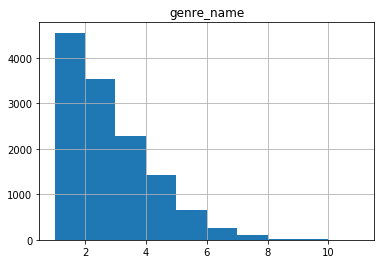

In [7]:
# Number of genres per book
genre_tags.loc[:,['wiki_id', 'genre_name']].groupby('wiki_id').count().hist()

In [189]:
def genres_for_books(wiki_ids):
    return genre_tags.loc[genre_tags['wiki_id'].isin(wiki_ids)]

# Look up multiple books
# genres_for_books(data.wiki_id.iloc[0:3])
# To look up single book wrap in an array
# genres_for_books([data.wiki_id[0]])

In [190]:
def genres_for_author(author):
    books_for_author = data.loc[data['author'] == author].loc[:, 'wiki_id']
    return genres_for_books(books_for_author)

# Look up genres for single author
# genres_for_author('George Orwell')

### Wieviele Autoren haben in wievielen unterschiedlichen Genres publiziert?

In [10]:
authors = data.groupby('author')

author_genres = []
for name, group in authors:
    author_genres += [
        [name, genres_for_books(group.wiki_id).genre_name.unique().size]
    ]

author_genres = pd.DataFrame(author_genres)
author_genres.describe()

,1
count,4714.000000
mean,2.441451
std,2.489543
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,22.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effcb9fa828>]], dtype=object)

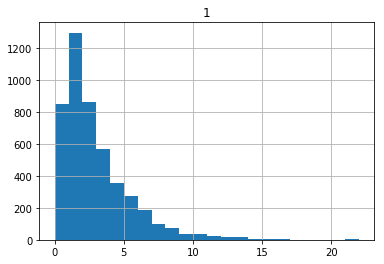

In [11]:
author_genres.hist( bins=22 )

### Wieviele Autoren haben wieviele unterschiedliche Bücher publiziert?

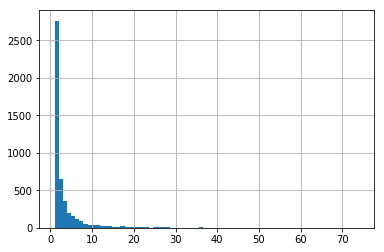

In [17]:
num_titles_per_author=authors.title.nunique()
plt=num_titles_per_author.hist(bins=num_titles_per_author.max())

In [18]:
print(num_titles_per_author.describe())

count    4714.000000
mean        3.006364
std         5.098350
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        74.000000
Name: title, dtype: float64


### Doppelbelegung von Titeln

In [19]:
titles=data.groupby("title")
print('Anzahl der doppelten Titeln:',titles.nunique().loc[titles.nunique().wiki_id > 1].shape)

Anzahl der doppelten Titeln: (246, 7)


In [20]:
titles.nunique().loc[titles.nunique().wiki_id > 1].head()

,wiki_id,firebase_id,title,author,pub_date,genres,plot
title,,,,,,,
1945,2,2,1,2,2,2,2
A Casa,2,2,1,2,0,2,2
A Taste for Death,2,2,1,2,1,2,2
Abduction,2,2,1,2,2,2,2
American Beauty,2,2,1,2,2,1,2


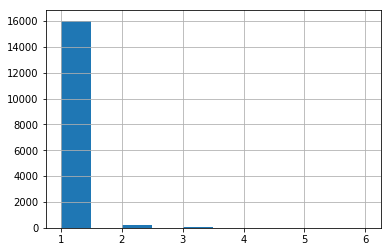

In [21]:
titles.nunique().wiki_id.hist()

## Mixing Plots

### Generate Binary Genre Vectors per book

In [191]:
# Extract k-hot-encoding of genres
@memory.cache
def extract_genres(data):
    result = data.genres.str.replace('[{}"]', '', regex=True) \
                         .str.replace('/m/.+?: ', '', regex=True) \
                         .str.get_dummies(', ')
    # Prefix and normalize genre columns
    result.columns = ['genre_' + str(col) for col in result.columns.str.lower().str.replace('[^a-z]', '_')]
    # Select genres that have been assigned at least twice.
    # 
    # Assuming we use genres only to match text an additional dimensions 
    # that is never shared will only make a text more 'different' from 
    # all other text. No information gain in that.
    # 
    # This reduces genres from 227 to 183. 
    result = result.loc[:, result.sum(axis=0) >= 2]
    
    return result

### Similarity Measures

#### Cosine-Similarity

The cosine similarity indicates similarity of orientation of two vectors by measuring the cosine of the angle between those vectors. Magnitude of the vectors is not of relevance. The cosine similarity is 0 for orthogonal vectors, 1 for vectors of the same orientation or -1  for diametrically opposed vectors.

$$ similarity: S_C(x,y) = cos(\pmb x, \pmb y) = \frac {\pmb x \cdot \pmb y}{||\pmb x|| \cdot ||\pmb y||} $$

As we are using the cosine similarity to compare attribute vectors in strictly positive space we can use the cosine distance, which is the complement of the cosine similarity in positive space. A distance of 0 indicates same orientation, a distance of 1 indicates no similarity or decorrelation and values in between indicate similarity or dissimilarity.

$$ D_C(x,y) = 1 - S_C(x,y) $$

##### Similarity Matrix

We calculate pairwise cosine similar for our books binary genre vectors.

In [192]:
@memory.cache
def calc_cosine_sim_matrix(genres):
    result = cosine_similarity(genres)
    result[np.tril_indices(result.shape[0])] = np.nan
    result = pd.DataFrame(result).apply(pd.to_numeric, downcast='float')
    return result

In [193]:
@memory.cache
def calc_cosine_dist_matrix(genres):
    return (calc_cosine_sim_matrix(genres) * -1.0) + 1.0

In [196]:
sim_matrix = calc_cosine_sim_matrix(extract_genres(data))

### Construction of artificial texts with shared authorship

As there is no labeled dataset of texts with shared and non-shared authorship (or at least non we know of), we have to construct a labeled dataset by artificially combining texts, then treating them as text of shared authorship and mix them with texts that have not been altered and are therefore considered to be of a non-shared authorship.

#### Combinatoric considerations

While combining texts for mixed authorship there are several factors that can be considered and varied to create different datasets that might effect the results later.

__Degree of similarity__  
By varying a threshold of similarity we assume that the difficulty of resulting combinations can be effected. Determining shared authorship of texts that are more alike by any given measure upfront, might be more difficult to detect than with a combined text of which original texts were considered less alike upfront.

__Reuse of texts__  
A text that was used for combination could be or not be reused for combination with additional texts or it could also be not be used as a text of non-shared authorship in the same dataset.

__Method of combination__  
There are different ways to combine texts. The simplest being to append on text to another. Another approach could be to split individual texts into paragraphs or sentences and interleave or randomly mix those tokens.
  
__Number of texts being combined__  
Any number of texts could be combined to create texts of shared authorship with different degrees, e.g. 1 to n authors.
  
__Share of combined texts in the resulting dataset__  
Depending on used features and techniques the percentage of shared texts vs texts of single authorship might effect the algorithms performance for new unrelated datasets.

#### Building a dataset

In [194]:
def build_dataset(
    # The dataset 
    data,
    sim_matrix,
    sim_threshold = 0.5,
    reuse_texts = False,
    combination = 'append',
    comb_degree = 2,
    target_share = 0.2,
    text_col = 'plot'
):  
    if comb_degree > 2:
        raise NotImplementedError
    # Total number of available texts
    n_total = data.shape[0]
    # Instantiate number of texts that will be combined
    n_combine = 0
    # Calculate number of combined texts
    if (reuse_texts):
        raise NotImplementedError
    else:
        # Number of texts that will be combined
        n_combine = n_total * comb_degree / (1/target_share + comb_degree - 1)
    
    # `n_combine` should be an integer value and dividable by `comb_degree` and
    # we will interpret target_share as minimum.
    n_combine = math.ceil(n_combine)
    n_combine += (n_combine % comb_degree)
    
    
    # Instantiate number of resulting combined texts
    n_combined = int(n_combine / comb_degree)
    # Number of texts that will directly be taken into the in the final dataset without combination
    n_direct = n_total - n_combine
    
    # Number of resulting texts
    n_result = n_direct + n_combined
    actual_share = n_combined/n_result
    
    print('Total # of input texts: ', n_total)
    print('# of texts to combine: ', n_combine)
    print('# of resulting texts with shared authorship: ', n_combined)
    print('# of resulting texts without shared authorship: ', n_direct)
    print('Total # of resulting texts: ', n_result)
    print('Actual share of texts with shared authorship: ', actual_share)
    
    # override lower diagonal with nan to drop duplicates and self combination.
    # SHOULD BE DONE BEFORE PASSED TO THIS METHOD
    # sim_matrix[np.tril_indices(sim_matrix.shape[0])] = np.nan
    # dropping nan
    sim_df = sim_matrix.stack()
    # drop combinations below threshold and return left viable choices
    choices = sim_df[sim_df >= sim_threshold]
    
    to_combine = np.ndarray((n_combined), dtype=tuple)
    if reuse_texts:
        choices = choices.index.values
        to_combine = np.random.choice(choices, n_combined, replace=False)
    else:
        for i in range(to_combine.shape[0]):
            # choose random tuple
            choice = np.random.choice(choices.loc[choices.notna()].index.values)
            to_combine[i] = choice
            # drop all tuples including either choice
            choices.loc[[choice[0], choice[1]]] = np.nan
            choices.loc[:, [choice[0], choice[1]]] = np.nan

    tc_values = list(sum(to_combine,()))
    all_values = pd.Series(data.index.values)
    to_direct = all_values[~all_values.isin(tc_values)]
    
    # combine texts
    combined = pd.DataFrame([[append_texts(data, ids, text_col), 1] for ids in to_combine])
    direct = pd.DataFrame([[data[text_col][i], 0] for i in to_direct])
    
    result = pd.concat(
        [combined, direct],
        axis=0,
        ignore_index=True, 
        copy=False
    )
    
    result.columns = ['text', 'label']
    
    return result

In [195]:
def append_texts(data, ids, text_col = 'plot'):
    t = ""
    for i in range(len(ids)):
        t += data[text_col][ids[i]]
    return t

#### The simple case

To start with we will go with a simple case:

In [15]:
sim_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16559 entries, 0 to 16558
Columns: 16559 entries, 0 to 16558
dtypes: float32(16559)
memory usage: 1.0 GB


In [197]:
# sample_size = 100 # data.shape[0]
# dataset = build_dataset(data.iloc[0:sample_size], sim_matrix.iloc[0:sample_size, 0:sample_size])
dataset = build_dataset(
    data,
    sim_matrix,
    sim_threshold = 0.8,
    target_share = 0.5
)

Total # of input texts:  16559
# of texts to combine:  11040
# of resulting texts with shared authorship:  5520
# of resulting texts without shared authorship:  5519
Total # of resulting texts:  11039
Actual share of texts with shared authorship:  0.5000452939577861


In [198]:
dataset.to_csv('./datasets/constructed_2.csv', encoding='utf-8', doublequote=True)

### Helpers

In [13]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted(
    [(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars],
    key=lambda x: x[1], 
    reverse=True
)

[('sim_matrix', 1096802028),
 ('data', 83719140),
 ('Memory', 1184),
 ('NamespaceMagics', 888),
 ('append_texts', 136),
 ('build_dataset', 136),
 ('cosine_similarity', 136),
 ('genres_for_author', 136),
 ('genres_for_books', 136),
 ('var_dic_list', 136),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('stats', 80),
 ('getsizeof', 72),
 ('calc_cosine_dist_matrix', 56),
 ('calc_cosine_sim_matrix', 56),
 ('extract_genres', 56),
 ('load_raw_data', 56),
 ('memory', 56)]

## Feature selection

In [13]:
from nltk.tokenize import RegexpTokenizer
import nltk
import pandas as pd
from nltk.corpus import stopwords
import FEATURE_SELECTOR_v4
import datetime
import json

[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/julianluebke/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/julianluebke/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julianluebke/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/julianluebke/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Configuration

In [14]:
features_to_calc={
    # list with n for char_n_grams
    'char_n_grams': [1,2,3,4],        
    # list with n for word_n_grams
    'word_n_grams': [1,2,3],                                          
    # list with n for pos_n_grams
    'pos_n_grams':[1,2,3],                      
    # flag if average sentence length should be calculated
    'avg_sent_len':True,                         
    # flag if average token length should be calculated
    'avg_word_len':True,                         
    # flag if token per sentences should be calculated
    'token_per_sent':True,                      
    # flag if vocabulary_richness should be calculated
    'vocabulary_richness':True,                 
}

filter_params={
    # Filter by variance: (flag, Type_of_filter, [thresholds for each n in
    # word_n_grams])
    'var_word_n_grams':(True, 'VarianceThreshold', [0.001, 0.001, 0.001]),      
    # Filter by variance: (flag, Type_of_filter, [thresholds for each n in
    # char_n_grams])
    'var_char_n_grams':(True, 'VarianceThreshold', [0.001, 0.001, 0.001, 0.001]),   
    # Filter by variance: (flag, Type_of_filter, [thresholds for each n in
    # pos_n_grams])
    'var_pos_n_grams':(True, 'VarianceThreshold', [0.01, 0.01, 0.01]),       
    # Use the most common features: (flag, Type_of_filter, [thresholds for each n
    # in word_n_grams])
    'freq_word_n_grams':(False, 'relative', [0.05, 0.05, 0.05, 0.05]),
    # Use the most common features: (flag, Type_of_filter, [thresholds for each n
    # in char_n_grams])
    'freq_char_n_grams':(False, 'relative', [0.05, 0.05, 0.05, 0.05]),           
    # Use the most common features: (flag, Type_of_filter, [thresholds for each n
    # in pos_n_grams])
    'freq_pos_n_grams':(False, 'relative', [0.05, 0.05, 0.05])}            

token_params_1 = {
    # Word tokenizer
    'word_tokenizer':RegexpTokenizer(r'\w+'),  
    # Sentence tokenizer    
    'sent_tokenizer':nltk.data.load('tokenizers/punkt/english.pickle'), 
    # Group tokens: 'text'|'sentence'
    'get_tokens':'sentence',                                                    
    # 'lemma'|'stem'
    'word_strain':'stem',
    # Get tokens with length >= <int> or <= <int>: ('long',<int>)|('short',<int>)
    'filter_length':('long', 0),                                                
    # 'get'|'remove'
    'handle_stopwords':'',                                                      
    # Sentences tokens
    'get_sentences':False,                                                      
    # Remove punctuation
    'punctuation':"[,;.!—]",                                                   
    # Stopwords
    'lower_stop_words':set(stopwords.words('english')),                         
    # Original or uncapitalized stemms/lemmas
    'uncapitalized' : True                                                      
    }


In [17]:
#Path to data
path_data='.//datasets//constructed.csv'

# Read data
#df_booksummaries_all = pd.read_csv(path_data, sep='\t', names=[
#    "Wikipedia ID",
#    "Freebase ID",
#    "Book title",
#    "Book author", 
#    "Publication date" ,
#    "Genres", 
#    "Content"])

df_texts=pd.read_csv(path_data,sep=',',header=0, index_col=0)
serie_texts=df_texts.text

df_texts.text.size

13799

### Feature Selection

In [24]:
# Export Path
path_selected_features='.//Features//sel_features{0}.txt'.format(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M"))

In [4]:
selected_features = FEATURE_SELECTOR_v4.select_features(
    # Contents
    serie_texts=serie_texts,                          
    # Dictionary with the features which should be calculated
    features_to_calc=features_to_calc, 
    # Dictionary with the parameters for tokenizing the contents
    token_params_1=token_params_1,              
    # Dictionary with the parameters for filtering the n_grams
    filter_params=filter_params,
    # Threshold for tokens (only token which occure in more documents than in 20%)
    cv_min_df = 0.1,                           
    # Flag if the features should be selected or extracted
    flag_extract_features=False,
    # Path to already selected features       
    path_to_features=path_selected_features,    
    flag_tfidf=False)

word_n_grams 1
num 0         839
1         597
2         616
3         807
4         811
5         890
6         180
7        1040
8        1255
9         126
10        274
11        298
12         56
13        592
14         79
15        785
16        780
17        784
18        675
19        651
20        223
21       1559
22        204
23        312
24        676
25        496
26        885
27        423
28        616
29        231
         ... 
13769      59
13770      70
13771     543
13772     650
13773      51
13774      33
13775      25
13776     162
13777     180
13778      33
13779      86
13780      55
13781     122
13782    1046
13783     139
13784      48
13785     987
13786     774
13787      56
13788      47
13789      34
13790     103
13791      45
13792      35
13793     309
13794      29
13795      95
13796     214
13797       7
13798     464
Length: 13799, dtype: int64
rel               a       abl     about    accept       act    actual     after  \
0      0.022646 

word_n_grams 2
num 0        142
1        114
2         97
3        131
4        141
5        166
6         33
7        192
8        222
9         23
10        48
11        50
12         9
13       130
14        15
15       150
16       117
17       127
18       101
19       115
20        52
21       277
22        33
23        61
24       117
25        86
26       126
27        75
28       104
29        45
        ... 
13769     10
13770      9
13771    110
13772    129
13773     13
13774      5
13775      4
13776     24
13777     28
13778      5
13779     15
13780     11
13781     23
13782    183
13783     28
13784     11
13785    190
13786    146
13787      7
13788      9
13789      3
13790     25
13791      9
13792      4
13793     55
13794      0
13795     15
13796     41
13797      2
13798     85
Length: 13799, dtype: int64
rel           a few     a man     a new   a young    abl to  about the   after a  \
0      0.000000  0.000000  0.000000  0.007042  0.000000   0.007042  0.000000

word_n_grams 3
num 0         1
1         2
2         0
3         2
4         0
5         5
6         0
7         2
8         1
9         0
10        1
11        3
12        0
13        2
14        0
15        2
16        1
17        3
18        0
19        1
20        1
21       10
22        1
23        0
24        1
25        0
26        0
27        3
28        0
29        2
         ..
13769     0
13770     1
13771     1
13772     1
13773     1
13774     0
13775     0
13776     0
13777     0
13778     0
13779     0
13780     0
13781     0
13782     1
13783     0
13784     0
13785     1
13786     0
13787     0
13788     0
13789     0
13790     0
13791     1
13792     0
13793     1
13794     0
13795     0
13796     0
13797     0
13798     0
Length: 13799, dtype: int64
rel        in order to  one of the  that he is  the end of   to be a
0         0.000000    1.000000    0.000000    0.000000  0.000000
1         0.500000    0.000000    0.500000    0.000000  0.000000
2              NaN    

num 0         6927
1         5006
2         6666
3         7520
4         6241
5         7523
6         1507
7         7581
8        11962
9         1114
10        2205
11        2772
12         576
13        4889
14         823
15        6941
16        6064
17        7015
18        6930
19        5789
20        1935
21       14738
22        1687
23        2786
24        6056
25        4235
26        8024
27        3790
28        5516
29        1819
         ...  
13769      483
13770      549
13771     4393
13772     5740
13773      448
13774      349
13775      177
13776     1409
13777     1630
13778      468
13779      733
13780      388
13781      947
13782     7372
13783     1283
13784      413
13785     7137
13786     6070
13787      483
13788      351
13789      309
13790      923
13791      530
13792      364
13793     2845
13794      385
13795      948
13796     1810
13797      145
13798     3625
Length: 13799, dtype: int64
rel               "         '         (         -    

char_n_grams 3
num 0         6286
1         4623
2         6079
3         6771
4         5793
5         6712
6         1412
7         7030
8        10806
9         1027
10        2068
11        2588
12         531
13        4495
14         751
15        6349
16        5568
17        6434
18        6033
19        5344
20        1733
21       13441
22        1553
23        2542
24        5482
25        3862
26        7367
27        3464
28        4994
29        1655
         ...  
13769      456
13770      518
13771     4015
13772     5394
13773      393
13774      326
13775      158
13776     1252
13777     1467
13778      390
13779      676
13780      371
13781      895
13782     6809
13783     1153
13784      377
13785     6706
13786     5648
13787      440
13788      333
13789      285
13790      831
13791      491
13792      341
13793     2565
13794      272
13795      877
13796     1696
13797      126
13798     3346
Length: 13799, dtype: int64
rel              (a        (t        (

char_n_grams 4
num 0        4660
1        3504
2        4376
3        4788
4        4453
5        4882
6        1083
7        5393
8        7854
9         765
10       1616
11       1983
12        379
13       3453
14        537
15       4678
16       4049
17       4850
18       4155
19       4044
20       1253
21       9963
22       1155
23       1890
24       3969
25       2876
26       5494
27       2605
28       3683
29       1245
         ... 
13769     359
13770     416
13771    2996
13772    4073
13773     281
13774     246
13775     126
13776     913
13777    1078
13778     212
13779     483
13780     294
13781     698
13782    5387
13783     835
13784     303
13785    5339
13786    4314
13787     312
13788     273
13789     218
13790     632
13791     355
13792     257
13793    1833
13794     126
13795     650
13796    1336
13797      75
13798    2638
Length: 13799, dtype: int64
rel             Aft       Ame       As        At        Bri       But       Car  \
0      0.000644 

pos_n_grams 1
num 0        1224
1         888
2        1070
3        1334
4        1148
5        1373
6         261
7        1429
8        2080
9         190
10        392
11        471
12         94
13        880
14        142
15       1219
16       1116
17       1218
18       1165
19       1003
20        351
21       2533
22        314
23        521
24       1072
25        748
26       1430
27        666
28        984
29        330
         ... 
13769      87
13770      95
13771     793
13772     982
13773      80
13774      55
13775      32
13776     253
13777     290
13778      78
13779     134
13780      75
13781     173
13782    1457
13783     230
13784      69
13785    1345
13786    1117
13787      86
13788      64
13789      52
13790     161
13791      79
13792      58
13793     515
13794      74
13795     154
13796     318
13797      20
13798     643
Length: 13799, dtype: int64
rel              CC        CD        DT        EX        FW        IN        JJ  \
0      0.051471  

num 0        1192
1         862
2        1058
3        1307
4        1123
5        1333
6         256
7        1384
8        2038
9         180
10        380
11        461
12         90
13        855
14        139
15       1198
16       1080
17       1188
18       1135
19        980
20        339
21       2474
22        306
23        473
24       1045
25        727
26       1389
27        649
28        957
29        317
         ... 
13769      86
13770      91
13771     770
13772     956
13773      77
13774      53
13775      31
13776     239
13777     285
13778      75
13779     129
13780      69
13781     167
13782    1406
13783     225
13784      68
13785    1301
13786    1079
13787      84
13788      60
13789      50
13790     160
13791      78
13792      52
13793     504
13794      71
13795     152
13796     305
13797      19
13798     631
Length: 13799, dtype: int64
rel           CC CD     CC DT     CC IN     CC JJ     CC MD     CC NN    CC NNS  \
0      0.000000  0.001678  0.00

pos_n_grams 3
num 0         977
1         720
2         967
3        1150
4         966
5        1158
6         212
7        1129
8        1767
9         151
10        291
11        397
12         78
13        715
14        132
15       1071
16        936
17        997
18        993
19        829
20        304
21       2186
22        256
23        388
24        911
25        622
26       1147
27        555
28        848
29        267
         ... 
13769      72
13770      76
13771     650
13772     769
13773      69
13774      49
13775      30
13776     196
13777     241
13778      65
13779     117
13780      54
13781     151
13782    1077
13783     195
13784      63
13785     967
13786     856
13787      71
13788      50
13789      45
13790     148
13791      69
13792      43
13793     424
13794      51
13795     136
13796     244
13797      18
13798     534
Length: 13799, dtype: int64
rel        CC DT JJ  CC DT NN  CC IN DT  CC IN JJ  CC IN NN  CC IN PRP  CC JJ JJ  \
0      0.000000 

[13799 rows x 552 columns]


In [5]:
# Save the selected features
with open(path_selected_features, 'w') as f:
    json.dump(selected_features, f)

## Feature Extraction

In [26]:
filter_params={
    # Filter by variance: (flag, Type_of_filter, [thresholds for each n in
    # word_n_grams])
    'var_word_n_grams':(False, 'VarianceThreshold', [0.05, 0.05, 0.05]),      
    # Filter by variance: (flag, Type_of_filter, [thresholds for each n in
    # char_n_grams])
    'var_char_n_grams':(False, 'VarianceThreshold', [0.05, 0.05, 0.05, 0.05]),   
    # Filter by variance: (flag, Type_of_filter, [thresholds for each n in
    # pos_n_grams])
    'var_pos_n_grams':(False, 'VarianceThreshold', [0.05, 0.05, 0.05]),       
    # Use the most common features: (flag, Type_of_filter, [thresholds for each n
    # in word_n_grams])
    'freq_word_n_grams':(False, 'relative', [0.05, 0.05, 0.05, 0.05]),
    # Use the most common features: (flag, Type_of_filter, [thresholds for each n
    # in char_n_grams])
    'freq_char_n_grams':(False, 'relative', [0.05, 0.05, 0.05, 0.05]),           
    # Use the most common features: (flag, Type_of_filter, [thresholds for each n
    # in pos_n_grams])
    'freq_pos_n_grams':(False, 'relative', [0.05, 0.05, 0.05, 0.05])}

### Calculating features on the entire text as a single sequence

In [25]:
# Import path
PATH_SEL_FEATURES = './Features/sel_features2018_12_08_23_53.txt'

# Export path
PATH_CALC_FEATURES = './Features/calc_features{0}.txt'.format(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M"))

In [31]:
# Extract features
extracted_features = FEATURE_SELECTOR_v4.select_features(
    # Contents
    serie_texts=serie_texts,                          
    # Dictionary with the features which should be calculated
    features_to_calc=features_to_calc, 
    # Dictionary with the parameters for tokenizing the contents
    token_params_1=token_params_1,              
    # Dictionary with the parameters for filtering the n_grams
    filter_params=filter_params,
    # Threshold for tokens
    cv_min_df = 0,                           
    # Flag if the features should be selected or extracted
    flag_extract_features=True,
    # Path to already selected features       
    path_to_features=PATH_SEL_FEATURES,    
    flag_tfidf=False)


word_n_grams 1
num 0         684
1         482
2         477
3         660
4         651
5         717
6         141
7         877
8        1018
9         102
10        223
11        232
12         49
13        497
14         67
15        658
16        621
17        632
18        581
19        546
20        186
21       1273
22        165
23        257
24        547
25        397
26        700
27        339
28        498
29        195
         ... 
13769      47
13770      56
13771     423
13772     517
13773      45
13774      30
13775      19
13776     132
13777     145
13778      29
13779      71
13780      46
13781     106
13782     834
13783     116
13784      41
13785     781
13786     624
13787      47
13788      42
13789      26
13790      89
13791      33
13792      28
13793     252
13794      20
13795      79
13796     178
13797       6
13798     356
Length: 13799, dtype: int64
rel               a     about     after       all      also        an       and  \
0      0.027778 

num 0        138
1        109
2         96
3        129
4        140
5        165
6         33
7        190
8        220
9         23
10        48
11        50
12         9
13       130
14        15
15       150
16       116
17       124
18       101
19       110
20        51
21       272
22        33
23        60
24       112
25        86
26       124
27        75
28       103
29        45
        ... 
13769     10
13770      9
13771    110
13772    125
13773     13
13774      5
13775      4
13776     23
13777     28
13778      5
13779     15
13780     11
13781     21
13782    180
13783     28
13784     11
13785    187
13786    141
13787      7
13788      9
13789      3
13790     24
13791      9
13792      4
13793     54
13794      0
13795     15
13796     41
13797      2
13798     82
Length: 13799, dtype: int64
rel           a few     a man     a new   a young    abl to  about the   after a  \
0      0.000000  0.000000  0.000000  0.007246  0.000000   0.007246  0.000000   
1      0.00

num 0         1
1         2
2         0
3         2
4         0
5         5
6         0
7         2
8         1
9         0
10        1
11        3
12        0
13        2
14        0
15        2
16        1
17        3
18        0
19        1
20        1
21       10
22        1
23        0
24        1
25        0
26        0
27        3
28        0
29        2
         ..
13769     0
13770     1
13771     1
13772     1
13773     1
13774     0
13775     0
13776     0
13777     0
13778     0
13779     0
13780     0
13781     0
13782     1
13783     0
13784     0
13785     1
13786     0
13787     0
13788     0
13789     0
13790     0
13791     1
13792     0
13793     1
13794     0
13795     0
13796     0
13797     0
13798     0
Length: 13799, dtype: int64
rel        in order to  one of the  that he is  the end of   to be a
0         0.000000    1.000000    0.000000    0.000000  0.000000
1         0.500000    0.000000    0.500000    0.000000  0.000000
2              NaN         NaN       

num 0         5984
1         4462
2         5892
3         6534
4         5425
5         6545
6         1343
7         6650
8        10467
9          982
10        1955
11        2490
12         517
13        4268
14         735
15        6116
16        5284
17        6174
18        5963
19        5173
20        1703
21       12946
22        1482
23        2430
24        5332
25        3726
26        7128
27        3322
28        4810
29        1573
         ...  
13769      427
13770      492
13771     3870
13772     5092
13773      385
13774      317
13775      153
13776     1202
13777     1445
13778      402
13779      654
13780      351
13781      846
13782     6481
13783     1137
13784      353
13785     6331
13786     5400
13787      422
13788      322
13789      278
13790      809
13791      466
13792      330
13793     2441
13794      298
13795      842
13796     1615
13797      122
13798     3206
Length: 13799, dtype: int64
rel               -         A         B         C    

num 0        2492
1        1943
2        2335
3        2709
4        2416
5        2738
6         585
7        3010
8        4360
9         407
10        824
11       1035
12        209
13       1914
14        315
15       2745
16       2282
17       2634
18       2462
19       2255
20        732
21       5481
22        637
23       1035
24       2192
25       1613
26       2982
27       1367
28       2020
29        677
         ... 
13769     190
13770     202
13771    1711
13772    2288
13773     155
13774     146
13775      70
13776     489
13777     603
13778     147
13779     281
13780     160
13781     386
13782    3083
13783     492
13784     162
13785    2879
13786    2384
13787     187
13788     153
13789     108
13790     368
13791     204
13792     132
13793    1061
13794      70
13795     357
13796     761
13797      46
13798    1410
Length: 13799, dtype: int64
rel              Ch        Co        Ha        Ma        Th        To        a   \
0      0.000000  0.000000  0.00

num 0         996
1         770
2         881
3        1010
4        1048
5        1132
6         246
7        1301
8        1769
9         147
10        316
11        404
12         85
13        766
14        115
15       1114
16        905
17       1024
18       1034
19        922
20        300
21       2178
22        265
23        392
24        877
25        645
26       1182
27        504
28        809
29        282
         ... 
13769      75
13770      82
13771     694
13772     931
13773      61
13774      63
13775      35
13776     191
13777     259
13778      72
13779     110
13780      67
13781     153
13782    1268
13783     188
13784      77
13785    1143
13786     935
13787      73
13788      63
13789      38
13790     171
13791      81
13792      58
13793     426
13794      10
13795     137
13796     347
13797      20
13798     595
Length: 13799, dtype: int64
rel             Car       Cha       The       add       an        and       are  \
0      0.000000  0.000000  0.01

pos_n_grams 1
num 0        1177
1         864
2        1053
3        1304
4        1109
5        1328
6         253
7        1370
8        2028
9         180
10        379
11        458
12         88
13        852
14        141
15       1190
16       1090
17       1181
18       1128
19        972
20        335
21       2469
22        307
23        487
24       1040
25        725
26       1383
27        643
28        952
29        318
         ... 
13769      85
13770      88
13771     762
13772     946
13773      77
13774      52
13775      32
13776     243
13777     282
13778      76
13779     129
13780      71
13781     168
13782    1402
13783     224
13784      66
13785    1304
13786    1086
13787      84
13788      63
13789      51
13790     157
13791      79
13792      56
13793     499
13794      74
13795     153
13796     301
13797      20
13798     626
Length: 13799, dtype: int64
rel              CC        CD        DT        IN        JJ        MD        NN  \
0      0.053526  

pos_n_grams 2
num 0         556
1         458
2         704
3         767
4         576
5         767
6         149
7         727
8        1189
9         100
10        186
11        253
12         53
13        458
14         96
15        757
16        646
17        673
18        735
19        561
20        212
21       1484
22        193
23        237
24        604
25        434
26        717
27        371
28        587
29        194
         ... 
13769      51
13770      46
13771     426
13772     479
13773      48
13774      35
13775      26
13776     139
13777     173
13778      51
13779      81
13780      35
13781     107
13782     555
13783     132
13784      42
13785     515
13786     481
13787      51
13788      34
13789      30
13790     111
13791      54
13792      32
13793     295
13794      41
13795      91
13796     175
13797      16
13798     342
Length: 13799, dtype: int64
rel           DT JJ     DT NN     IN DT     IN JJ     IN NN     JJ NN     MD VB  \
0      0.026978  

pos_n_grams 3
num 0        281
1        257
2        425
3        422
4        310
5        447
6         86
7        399
8        679
9         50
10        96
11       142
12        33
13       242
14        63
15       465
16       371
17       356
18       464
19       325
20       145
21       859
22       123
23       123
24       329
25       251
26       390
27       215
28       343
29       109
        ... 
13769     27
13770     29
13771    250
13772    232
13773     23
13774     23
13775     19
13776     77
13777    103
13778     34
13779     41
13780      9
13781     68
13782    245
13783     72
13784     27
13785    201
13786    206
13787     28
13788     17
13789     13
13790     68
13791     34
13792     19
13793    183
13794     17
13795     52
13796     98
13797     12
13798    178
Length: 13799, dtype: int64
rel        DT JJ NN  DT NN IN  DT NN NN  IN DT JJ  IN DT NN  IN JJ NN  IN NN NN  \
0      0.046263  0.032028  0.078292  0.014235  0.074733  0.017794  0.035587   

In [32]:
print(extracted_features.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13799 entries, 0 to 13798
Columns: 1000 entries, avg_sent_len to TO VB NN
dtypes: float64(1000)
memory usage: 105.4 MB
None


In [116]:
print(extracted_features)

       avg_sent_len  avg_word_len  token_per_sent  vocabulary_richness  \
0         77.527473      5.763889       13.450549             0.313725   
1        127.025000      5.721847       22.200000             0.443694   
2        164.512195      6.303738       26.097561             0.414019   
3         89.011628      5.738381       15.511628             0.397301   
4        112.535714      5.489547       20.500000             0.356272   
5        120.265625      5.605972       21.453125             0.356883   
6        117.153846      5.835249       20.076923             0.590038   
7         99.389610      5.355493       18.558442             0.314906   
8        109.864865      5.862981       18.738739             0.350000   
9        102.909091      5.957895       17.272727             0.684211   
10       123.833333      5.686224       21.777778             0.540816   
11       122.000000      5.957537       20.478261             0.560510   
12       116.800000      6.212766     

In [33]:
# Save the calculated features
extracted_features.to_csv(path_or_buf=PATH_CALC_FEATURES, sep=',', header=True, index=True)

In [118]:
serie_texts.apply(len).describe()

count    13799.000000
mean      3013.367128
std       3408.345904
min         11.000000
25%        810.000000
50%       1879.000000
75%       4050.000000
max      72504.000000
Name: text, dtype: float64

### Calculating features on overlapping sequences of each text

In [182]:
@memory.cache
def sequences(s):
    words = s.str.split()
    words = pd.DataFrame(words.apply(np.array_split, indices_or_sections=4).tolist())
    return words.applymap(lambda s: " ".join(s) )

In [183]:
text_seqs = sequences(serie_texts)

In [184]:
text_seqs

,0,1,2,3
0,This children's tale is about a china doll nam...,"were caught, they were brought before Scourge....",have been attacking patrols. Firestar must hel...,"takes them there. Violet, Barley, and Ravenpaw..."
1,Villiers opens the novel with his main charact...,to the still somewhat doubtful Ewald how he wi...,"next weeks, she poses for Edison and her exact...","there hang on, until there are less than a few..."
2,A world of strikingly humanoid beings is disco...,annihilation due to Manticore's unmatchable ta...,three inhabited planets in the Manticore Syste...,Manticoran leadership is confident of their ab...
3,It’s late February in Chicago – about eight mo...,Dresden fools the Denarian into taking a decoy...,"Fellowship mentor, not her boyfriend. Her comm...","necktie, which was the same one used to hang J..."
4,The story concerns the move from boy to man of...,a natural rulebreaker and explorer of secret p...,to a quest at a New Order jail as Stephen and ...,"After some help from Byron Swain, the kids get..."
5,"An old Bedouin and two boys, one Jewish and th...","organizes them (minus the Ares cabin, who refu...","a dragon. Right when all hope seems lost, an u...",the war on the dawn of his 16th birthday. With...
6,"The central figure, Hildegarde Wolf, is a frau...",humorous coincidences and improbabilities. As ...,"In the sections that deal with the present, th...","Elisa Schlésinger, who would later influence h..."
7,The novel opens on an overcast October 23. Two...,"is the Illustrated Man, covered in tattoos, an...",to talk to him. Will's father pretends not to ...,him back from the edge of death. For twenty ye...
8,"The year is 2070, and the United Republic of A...",sailed on to 47 Ursae Majoris with no more inc...,does not spread beyond China's borders. Wong W...,down from their plans. The Georgia Zoo issue a...
9,Thirty-two-year-old narrator Kensuke Yazaki ta...,"music, literature, pop culture, organising a s...",Sherine Khalil renames herself Athena. As a ch...,a contented life but her mind is not at ease. ...


## Training Classifiers

### Splitting into training and test data

In [60]:
from sklearn.model_selection import train_test_split

In [78]:
# REVIEW: we shouldn't get NaN values in the first place
# Fill NaN values in features
extracted_features.fillna(0, inplace=True)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(extracted_features, df_texts.label, test_size=0.33, random_state=42)

### SVM baseline classifier

In [65]:
from sklearn.svm import SVC

In [80]:
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
print(svm_clf.score(X_test, y_test))

0.7990777338603425


 ### Random Forest baseline classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf_clf = RandomForestClassifier(n_estimators=300)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
print(rf_clf.score(X_test, y_test))

0.8245498462889768
